# About Dataset

## Features
1. **ID**
2. **Customer ID**
3. **Month**: Represents the month of the year
4. **Name**: Represents the name of a person
5. **Age**: Represents the age of the person
6. **SSN**: Represents the social security number of a person
7. **Occupation**: Represents the occupation of the person
8. **Annual_Income**: Represents the annual income of the person
9. **Monthly_Inhand_Salary**: Represents the monthly base salary of a person
10. **Num_Bank_Accounts**: Represents the number of bank accounts a person holds
11. **Num_Credit_Card**: Represents the number of other credit cards held by a person
12. **Interest_Rate**: Represents the interest rate on credit card
13. **Num_of_Loan**: Represents the number of loans taken from the bank
14. **Type_of_Loan**: Represents the types of loan taken by a person
15. **Delay_from_due_date**: Represents the average number of days delayed from the payment date
16. **Num_of_Delayed_Payment**: Represents the average number of payments delayed by a person
17. **Changed_Credit_Limit**: Represents the percentage change in credit card limit
18. **Num_Credit_Inquiries**: Represents the number of credit card inquiries
19. **Credit_Mix**: Represents the classification of the mix of credits
20. **Outstanding_Debt**: Represents the remaining debt to be paid (in USD)
21. **Credit_Utilization_Ratio**: Represents the utilization ratio of credit card
22. **Credit_History_Age**: Represents the age of credit history of the person
23. **Payment_of_Min_Amount**: Represents whether only the minimum amount was paid by the person
24. **Total_EMI_per_month**: Represents the monthly EMI payments (in USD)
25. **Amount_invested_monthly**: Represents the monthly amount invested by the customer (in USD)
26. **Payment_Behaviour**: Represents the payment behavior of the customer (in USD)
27. **Monthly_Balance**: Represents the monthly balance amount of the customer (in USD)


## Problem Statemen
You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

## Task
Given a person’s credit-related information, build a machine learning model that can classify the credit score.

# Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold

import optuna

import warnings

warnings.filterwarnings("ignore")

<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject
D:\anaconda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Read The Data

In [61]:
df = pd.read_csv("data/train.csv")

In [62]:
df.head()

ID Customer_ID     Month  ...                 Payment_Behaviour     Monthly_Balance Credit_Score
0  0x1602   CUS_0xd40   January  ...   High_spent_Small_value_payments  312.49408867943663         Good
1  0x1603   CUS_0xd40  February  ...    Low_spent_Large_value_payments  284.62916249607184         Good
2  0x1604   CUS_0xd40     March  ...   Low_spent_Medium_value_payments   331.2098628537912         Good
3  0x1605   CUS_0xd40     April  ...    Low_spent_Small_value_payments  223.45130972736786         Good
4  0x1606   CUS_0xd40       May  ...  High_spent_Medium_value_payments  341.48923103222177         Good

[5 rows x 28 columns]

# Check of Data

In [63]:
df.shape

(100000, 28)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [65]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [66]:
df.duplicated().sum()

0

In [67]:
df["Credit_Score"].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [68]:
df.drop(["ID", "Customer_ID", "Name", "SSN"], axis=1, inplace=True)

# EDA

<Axes: >

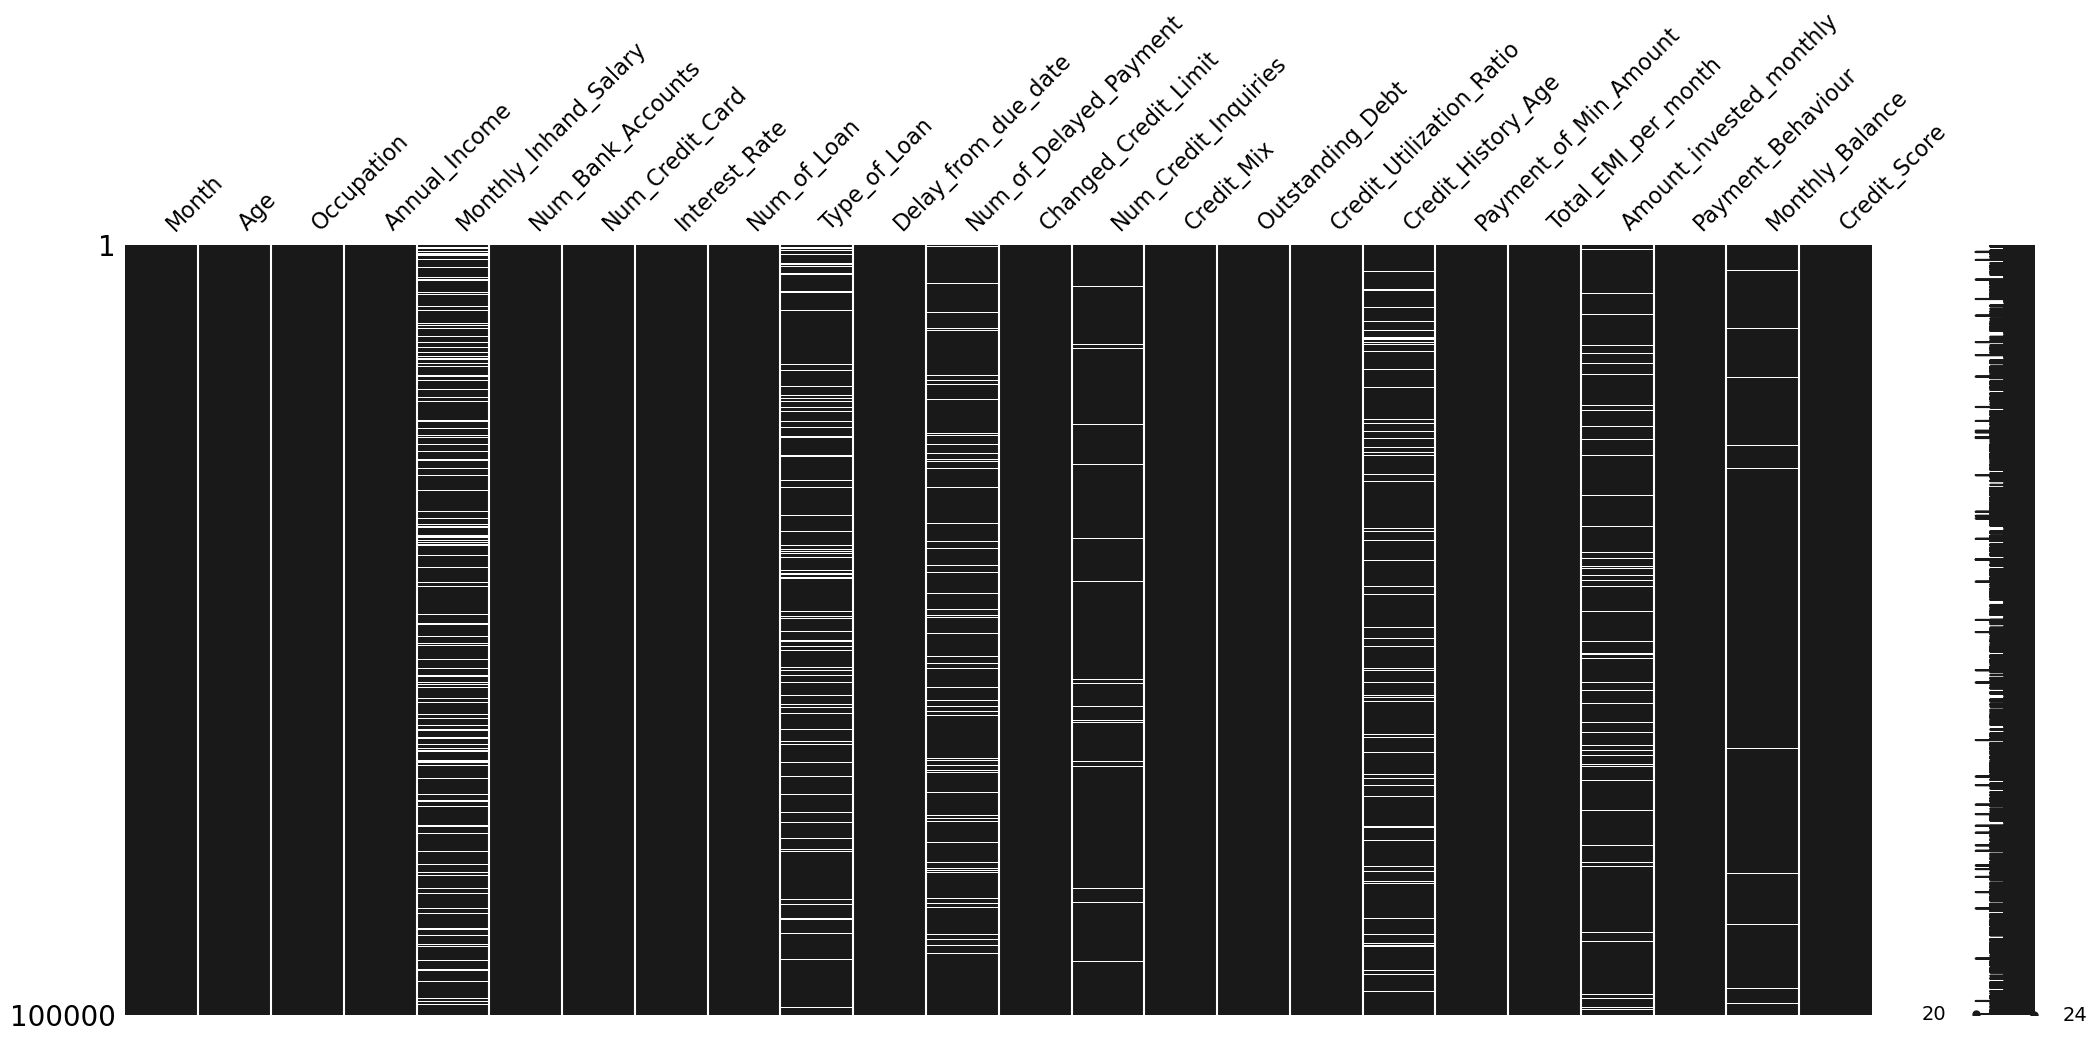

In [69]:
msno.matrix(df, color=(0.1, 0.1, 0.1))

In [70]:
des = df.describe().transpose()
des.style.background_gradient()

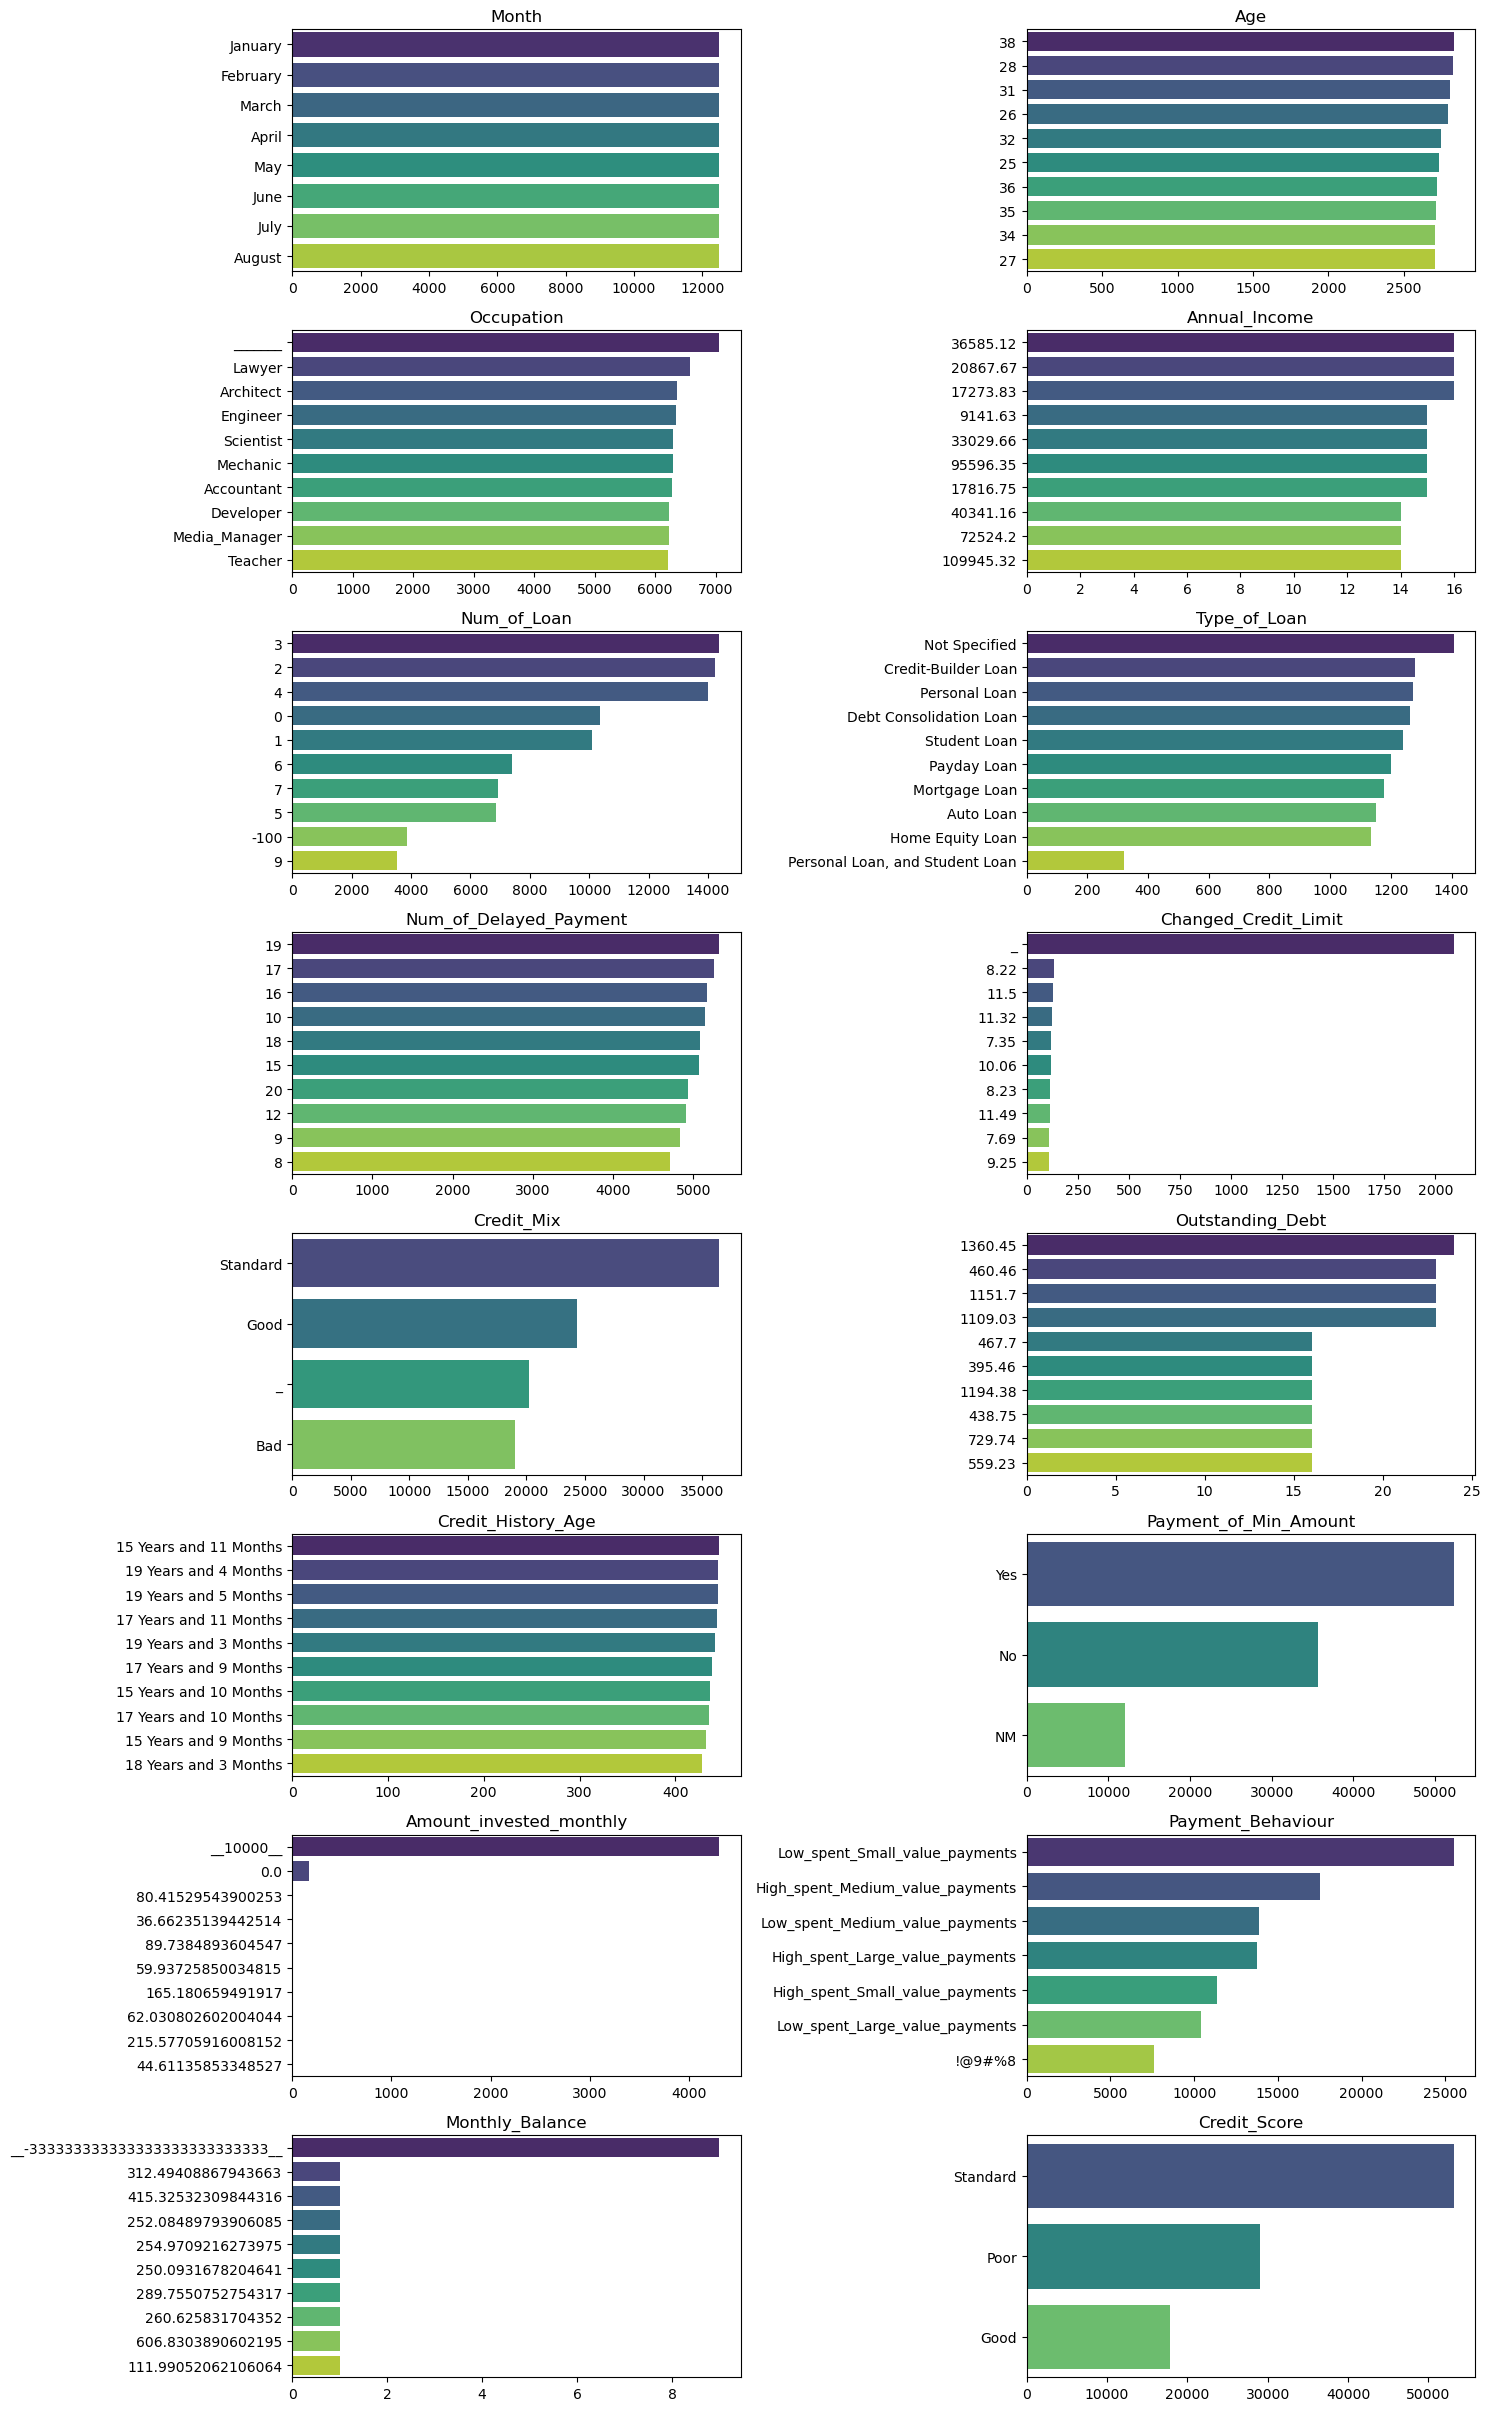

In [71]:
plt.figure(figsize=(15, 30))
for i, feature in enumerate(df.select_dtypes(include="object").columns):
    counts = df[feature].value_counts().head(10)
    plt.subplot(10, 2, i+1)
    sns.barplot(x=counts.values, y=counts.index, palette='viridis')
    plt.title(f"{feature}")
    plt.ylabel('')
plt.tight_layout()

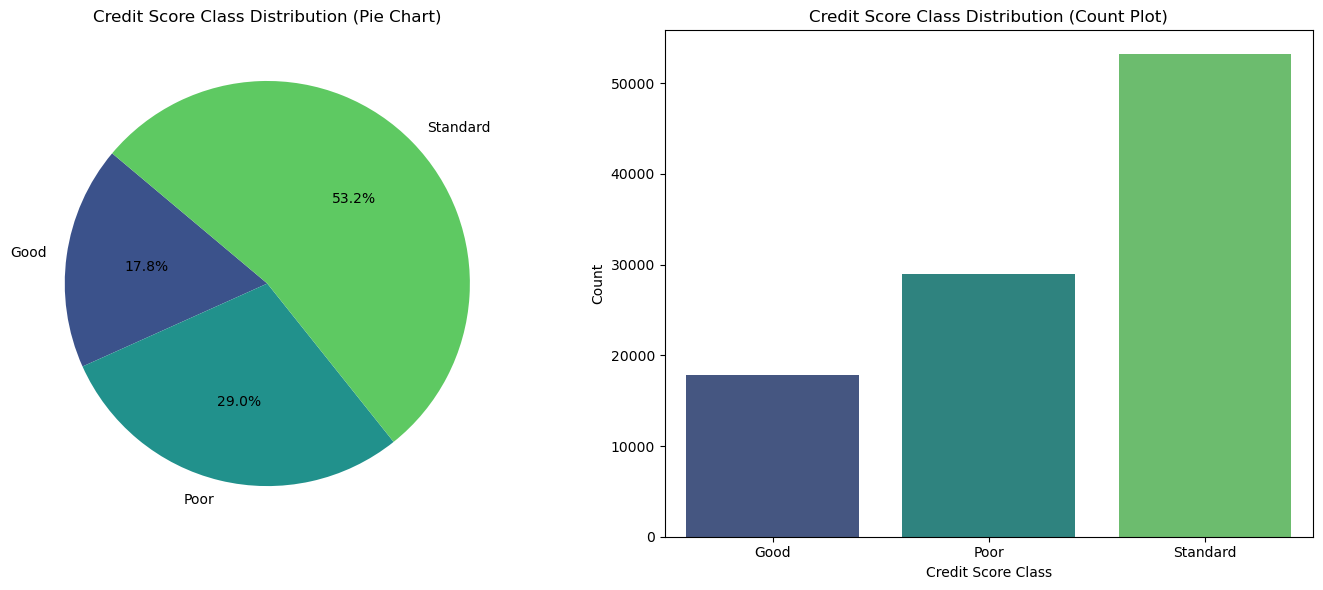

In [72]:
target_counts = df['Credit_Score'].value_counts().sort_index()

palette = sns.color_palette("viridis", n_colors=len(target_counts))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140, colors=palette)
ax1.set_title('Credit Score Class Distribution (Pie Chart)')
sns.countplot(x='Credit_Score', data=df, ax=ax2, palette=palette, order=target_counts.index)
ax2.set_title('Credit Score Class Distribution (Count Plot)')
ax2.set_xlabel('Credit Score Class')
ax2.set_ylabel('Count')
plt.tight_layout()
plt.show()

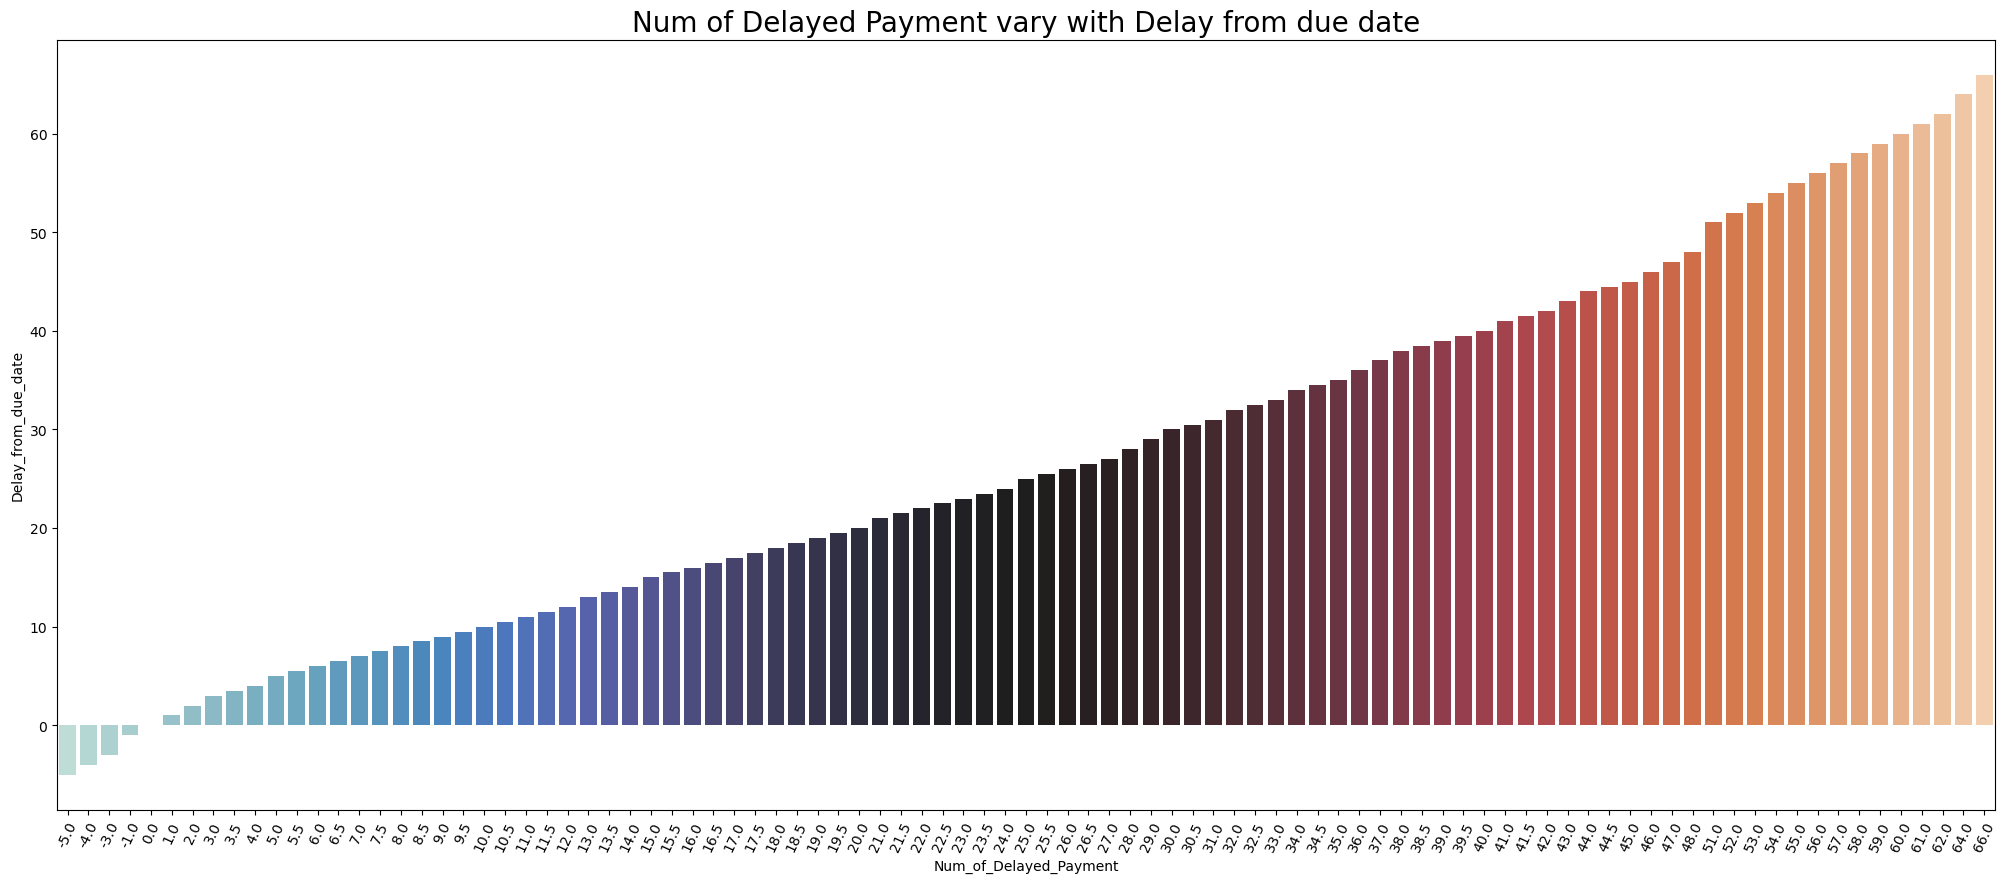

In [82]:
#How Num of Delayed Payment vary with Delay from due date
income_with_age = df.groupby("Num_of_Delayed_Payment")["Delay_from_due_date"].median()

plt.figure(figsize=(25, 10))
sns.barplot(x=income_with_age, y=income_with_age.values, palette='icefire')
plt.title("Num of Delayed Payment vary with Delay from due date", fontsize=20)
plt.xlabel("Num_of_Delayed_Payment")
plt.ylabel("Delay_from_due_date")
plt.xticks(rotation=65)
plt.show()

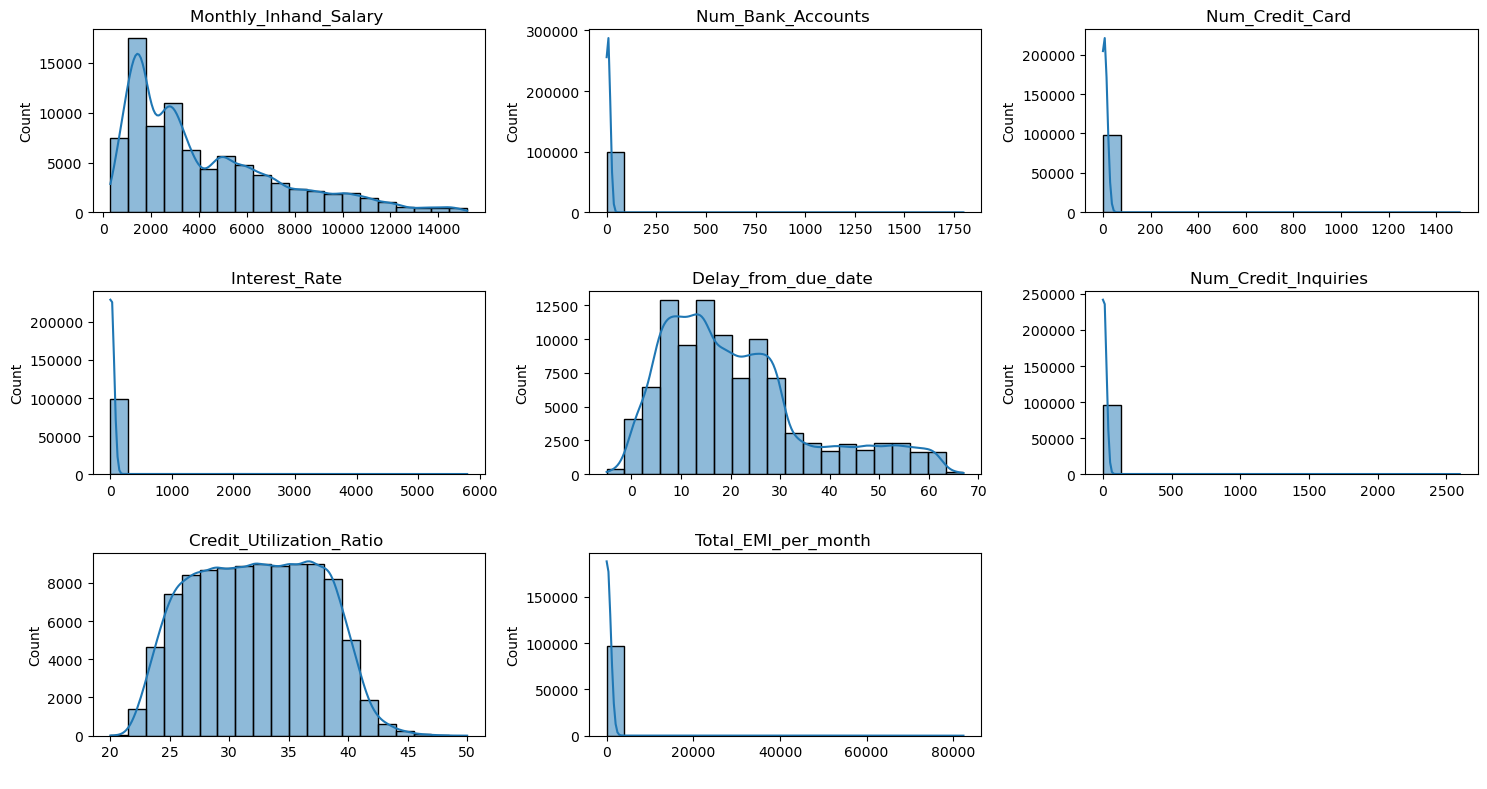

In [74]:
plt.figure(figsize=(15, 8))
for i, feature in enumerate(df.select_dtypes(include="number").columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=df, x=feature, kde=True, bins=20)
    plt.title(f'{feature} ')
    plt.xlabel(' ')
plt.tight_layout()

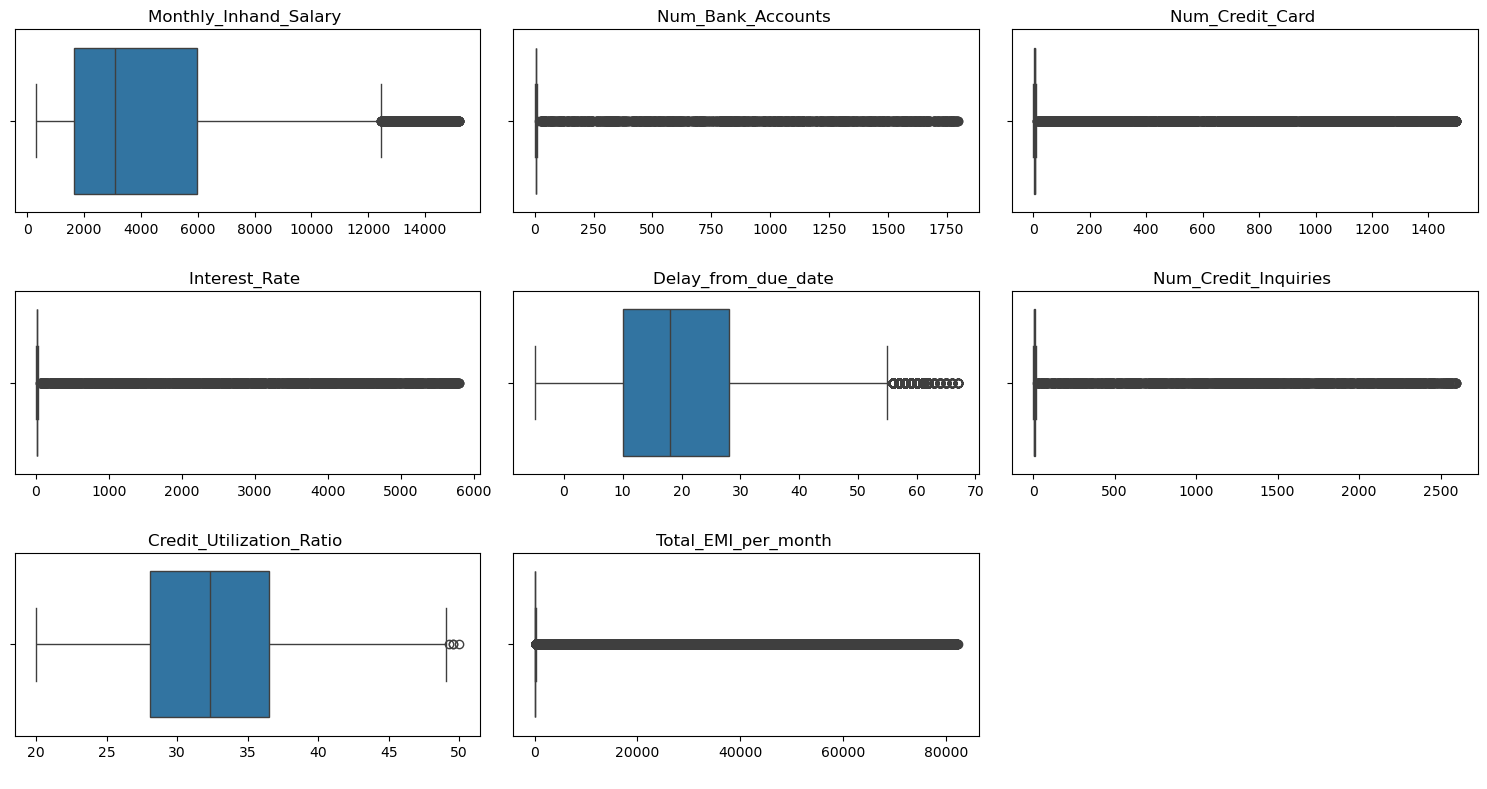

In [75]:
plt.figure(figsize=(15, 8))
for i, feature in enumerate(df.select_dtypes(include="number").columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, x=feature)
    plt.title(f'{feature} ')
    plt.xlabel(' ')
plt.tight_layout()

# Missing Values Treatment

In [76]:
df["Monthly_Inhand_Salary"] = df["Monthly_Inhand_Salary"].fillna(df["Monthly_Inhand_Salary"].median())
df["Type_of_Loan"] = df["Type_of_Loan"].fillna("Not Specified")
df["Num_Credit_Inquiries"] = df["Num_Credit_Inquiries"].fillna(df["Num_Credit_Inquiries"].median())
df["Credit_History_Age"] = df["Credit_History_Age"].fillna("Not Specified")

In [77]:
import re

columns_to_convert = ["Age", "Annual_Income", "Num_of_Loan", "Num_of_Delayed_Payment", 
                      "Changed_Credit_Limit", "Outstanding_Debt", 
                      "Amount_invested_monthly", "Monthly_Balance"]

def clean_and_convert(val):
    if isinstance(val, str):
        # Use re to remove any character that is not a digit
        val = re.sub(r'[^\d]', '', val)
        return int(val) if val.isdigit() else None
    return val

for col in columns_to_convert:
    df[col] = df[col].apply(clean_and_convert)

df[columns_to_convert] = df[columns_to_convert].astype('float64')

print(df.dtypes)

Month                        object
Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object


In [78]:
df["Num_of_Delayed_Payment"] = df["Num_of_Delayed_Payment"].fillna(df["Num_of_Delayed_Payment"].median())
df["Changed_Credit_Limit"] = df["Changed_Credit_Limit"].fillna(df["Changed_Credit_Limit"].median())
df["Amount_invested_monthly"] = df["Amount_invested_monthly"].fillna(df["Amount_invested_monthly"].median())
df["Monthly_Balance"] = df["Monthly_Balance"].fillna(df["Monthly_Balance"].median())

<Axes: >

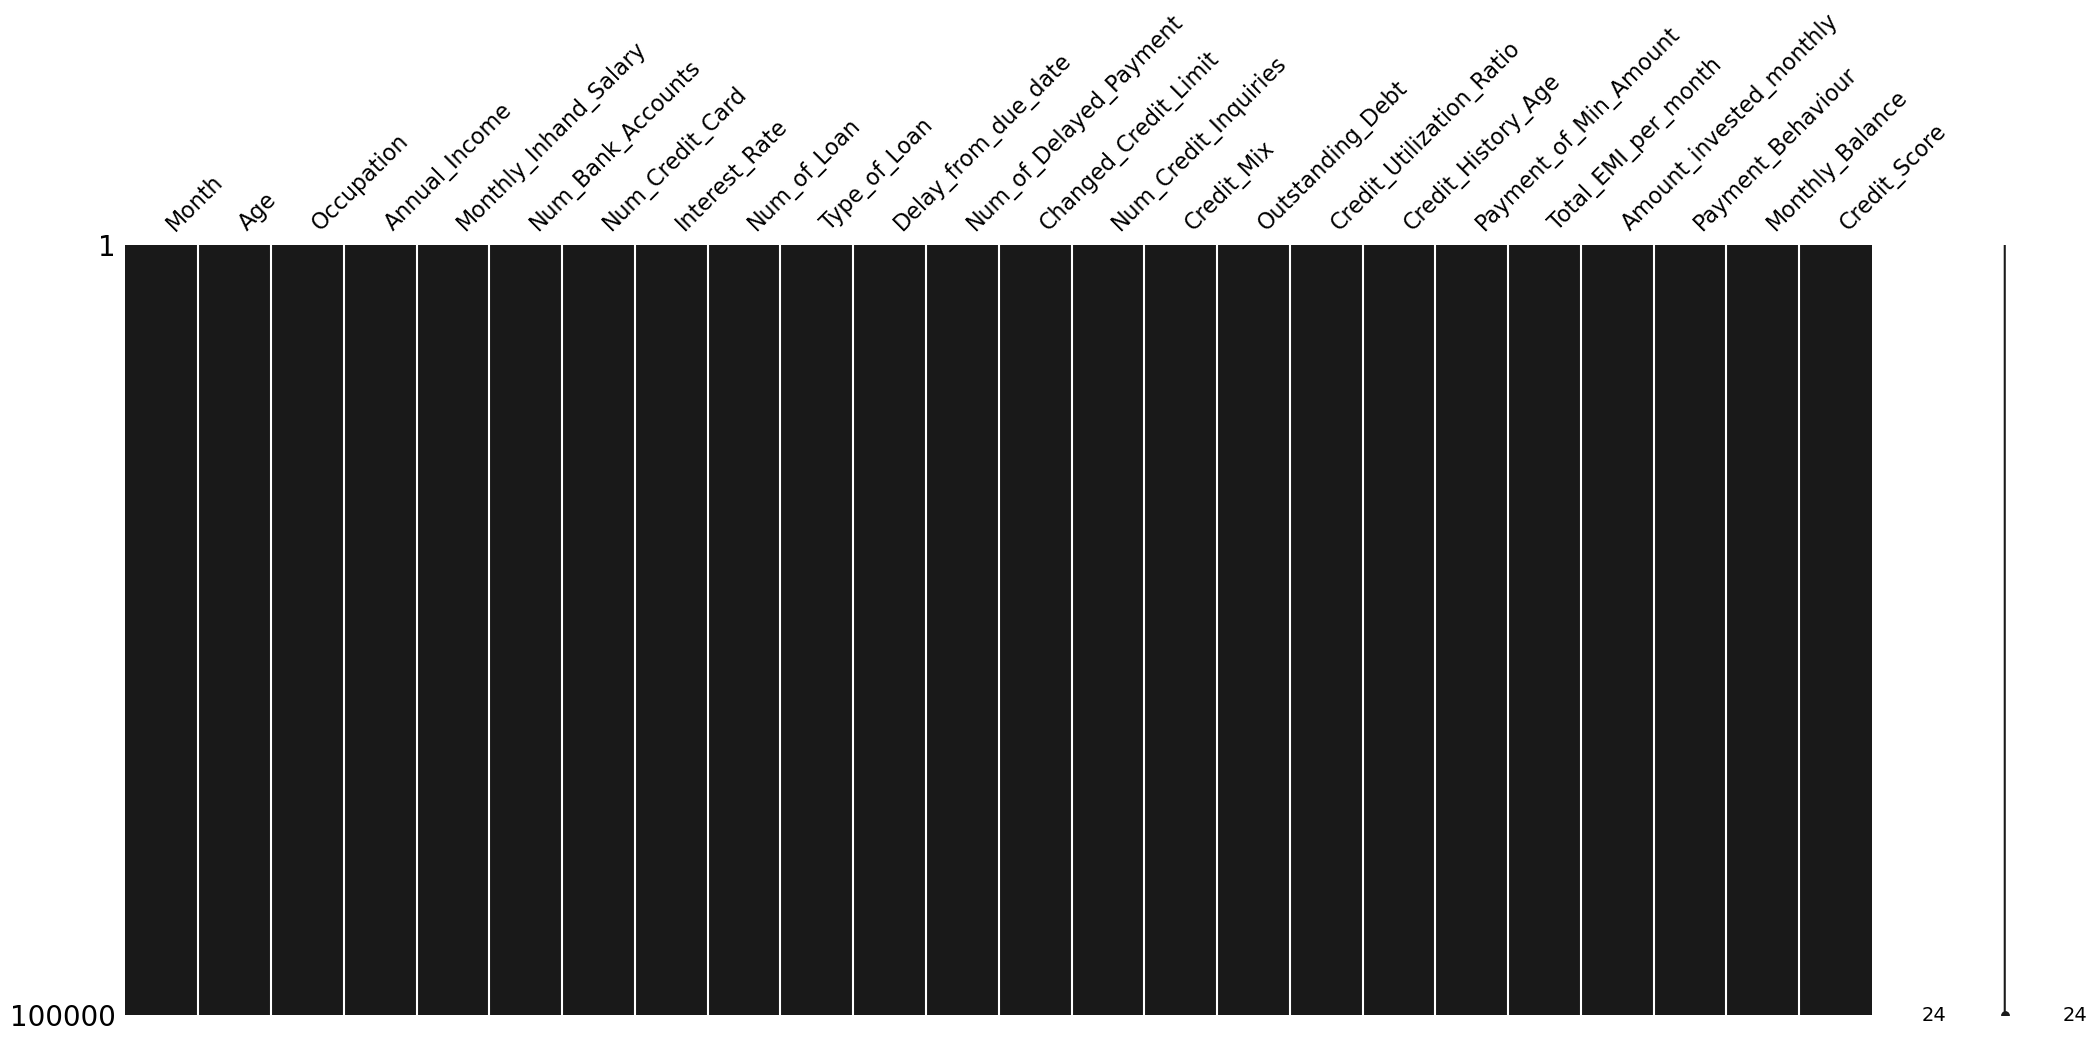

In [79]:
msno.matrix(df, color=(0.1, 0.1, 0.1))

# Outliers Treatment

In [ ]:
def remove_outliers6(feature):
    global df
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.6)
    iqr = q3 - q1

    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)

    df = df.loc[(df[feature] < upper_limit) & (df[feature] > lower_limit)]
    
    
def remove_outliers7(feature):
    global df
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1

    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)

    df = df.loc[(df[feature] < upper_limit) & (df[feature] > lower_limit)]

In [85]:
outliers_list = ["Age", "Annual_Income", "Num_Bank_Accounts", "Num_Credit_Card", "Interest_Rate",
                 "Num_of_Loan", "Num_of_Delayed_Payment", "Changed_Credit_Limit", 
                 "Num_Credit_Inquiries", "Total_EMI_per_month"]

for feature in outliers_list:
    remove_outliers6(feature)

In [86]:
for feature in ["Monthly_Inhand_Salary", "Delay_from_due_date", "Outstanding_Debt",
                "Credit_Utilization_Ratio", "Amount_invested_monthly", "Monthly_Balance"]:
    remove_outliers7(feature)

# Encoding

In [88]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for i in df.select_dtypes(include="object").columns:
    df[i] = encoder.fit_transform(df[i])

# Correlation Matrix

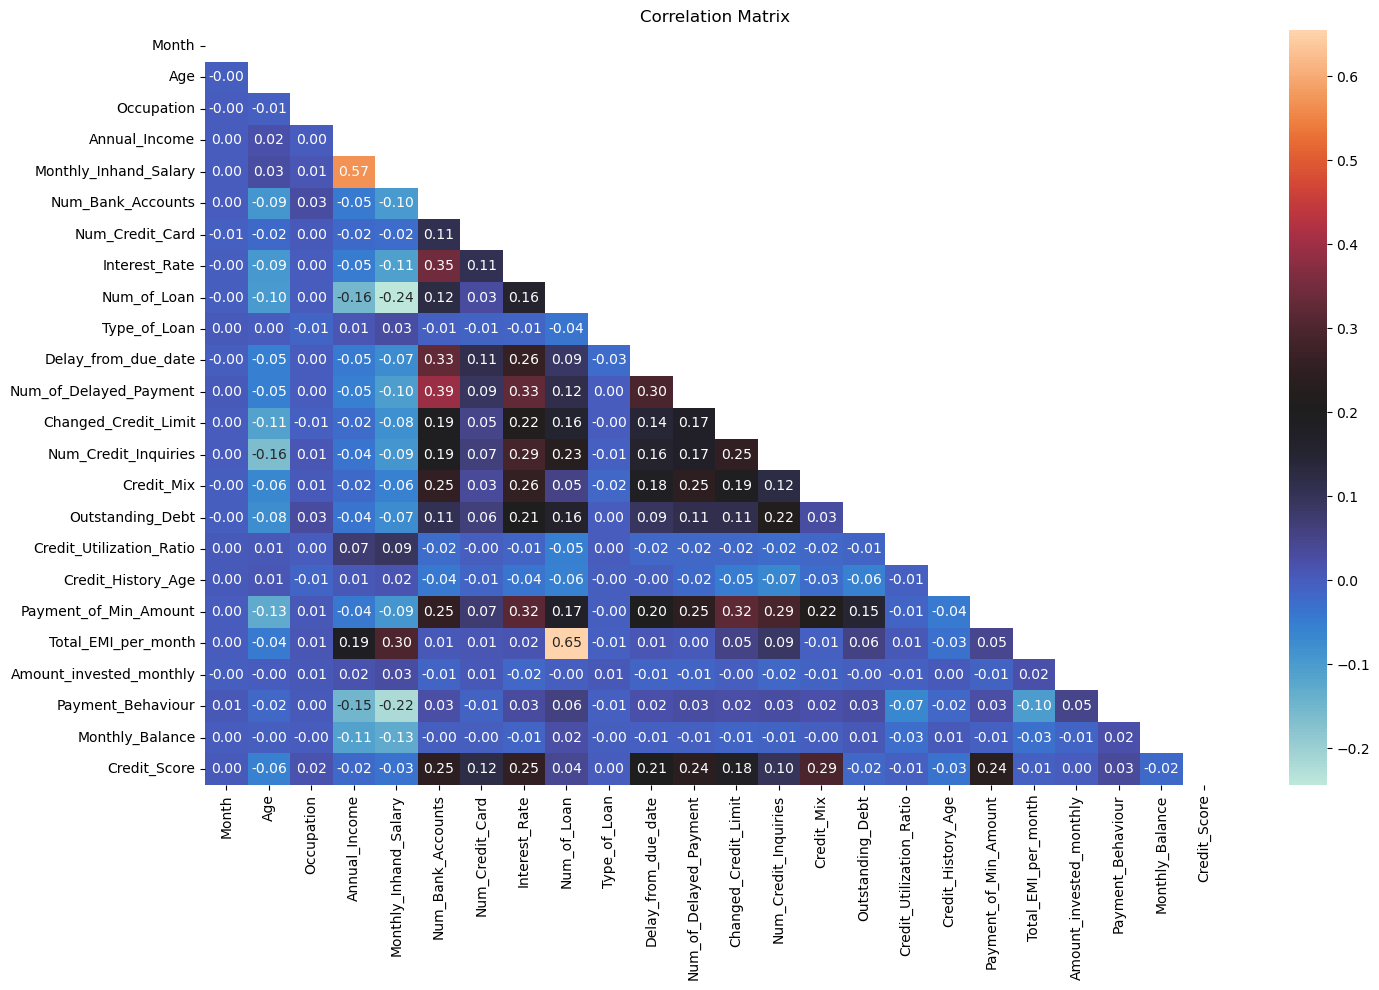

In [89]:
corr = df.corr()
mask_ut = np.triu(np.ones(corr.shape)).astype(np.bool_)

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="icefire", mask=mask_ut)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# Features Selection

In [94]:
X = df.drop("Credit_Score", axis=1)
y = df["Credit_Score"]

In [95]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 , f_classif 

FeatureSelection = SelectKBest(score_func=f_classif ,k=17)
X = FeatureSelection.fit_transform(X, y)

# Handeling Inbalance Data

In [96]:
from imblearn.over_sampling import SMOTE
somte = SMOTE(random_state=42)

X, y = somte.fit_resample(X, y)

y.value_counts()

  File "D:\anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Credit_Score
0    17020
2    17020
1    17020
Name: count, dtype: int64

In [97]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

# Train Test Split

In [98]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((40848, 17), (40848,), (10212, 17), (10212,))

# Model Building

In [110]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# Objective function for Optuna
def objective(trial):
    # Hyperparameters
    param = {
        'objective': 'multiclass',
        'metric': 'multi_logloss',
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0),
    }

    # Create the LightGBM model
    model = LGBMClassifier(**param)

    # Train the model
    model.fit(x_train, y_train)

    # Make predictions and evaluate
    preds = model.predict(x_test)
    accuracy = accuracy_score(y_test, preds)

    return accuracy  # Maximize accuracy

# Optimize with Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2024-09-20 15:34:07,886] A new study created in memory with name: no-name-2ce8a570-89f0-4c36-9a95-51e47b7861db


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008540 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-09-20 15:34:22,797] Trial 0 finished with value: 0.8934586760673717 and parameters: {'learning_rate': 0.06772246705776443, 'n_estimators': 871, 'num_leaves': 147, 'max_depth': 5, 'min_child_samples': 73, 'subsample': 0.6711995372035167, 'colsample_bytree': 0.7468202283894284, 'reg_alpha': 0.43061040435200965, 'reg_lambda': 7.0552710549816195}. Best is trial 0 with value: 0.8934586760673717.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001728 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

[I 2024-09-20 15:34:45,671] Trial 1 finished with value: 0.8840579710144928 and parameters: {'learning_rate': 0.021452626324178572, 'n_estimators': 479, 'num_leaves': 104, 'max_depth': 10, 'min_child_samples': 62, 'subsample': 0.6078688089476674, 'colsample_bytree': 0.5855245755303755, 'reg_alpha': 7.743586428289877, 'reg_lambda': 0.22841112132462071}. Best is trial 0 with value: 0.8934586760673717.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006444 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


[I 2024-09-20 15:34:58,476] Trial 2 finished with value: 0.8940462201331767 and parameters: {'learning_rate': 0.043195019713699594, 'n_estimators': 406, 'num_leaves': 61, 'max_depth': 11, 'min_child_samples': 15, 'subsample': 0.5019385790563256, 'colsample_bytree': 0.6443136537463854, 'reg_alpha': 1.6124649847741133, 'reg_lambda': 7.030222482687947}. Best is trial 2 with value: 0.8940462201331767.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006801 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-09-20 15:35:28,690] Trial 3 finished with value: 0.9039365452408931 and parameters: {'learning_rate': 0.05942810062137822, 'n_estimators': 972, 'num_leaves': 132, 'max_depth': 12, 'min_child_samples': 34, 'subsample': 0.663021439504343, 'colsample_bytree': 0.7417661746692643, 'reg_alpha': 7.402746870030388, 'reg_lambda': 9.130848209602764}. Best is trial 3 with value: 0.9039365452408931.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008475 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-09-20 15:35:39,758] Trial 4 finished with value: 0.8056208382295339 and parameters: {'learning_rate': 0.012823896816287098, 'n_estimators': 299, 'num_leaves': 100, 'max_depth': 8, 'min_child_samples': 87, 'subsample': 0.6103542055710196, 'colsample_bytree': 0.9171554696848074, 'reg_alpha': 0.12560758468692979, 'reg_lambda': 1.6049138113547625}. Best is trial 3 with value: 0.9039365452408931.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007306 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-09-20 15:35:46,711] Trial 5 finished with value: 0.882295338817078 and parameters: {'learning_rate': 0.052322495020166664, 'n_estimators': 172, 'num_leaves': 79, 'max_depth': 12, 'min_child_samples': 81, 'subsample': 0.7504483440759908, 'colsample_bytree': 0.9278881983231502, 'reg_alpha': 3.5041072958710258, 'reg_lambda': 0.22412305720753384}. Best is trial 3 with value: 0.9039365452408931.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007849 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-09-20 15:36:03,019] Trial 6 finished with value: 0.9095182138660399 and parameters: {'learning_rate': 0.08070385786157457, 'n_estimators': 376, 'num_leaves': 95, 'max_depth': 11, 'min_child_samples': 35, 'subsample': 0.9092582009446026, 'colsample_bytree': 0.8097530342356626, 'reg_alpha': 4.580924343211472, 'reg_lambda': 0.588392477646315}. Best is trial 6 with value: 0.9095182138660399.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010224 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-09-20 15:36:10,494] Trial 7 finished with value: 0.8099294947121034 and parameters: {'learning_rate': 0.03217736514324605, 'n_estimators': 522, 'num_leaves': 96, 'max_depth': 4, 'min_child_samples': 48, 'subsample': 0.9013979153862235, 'colsample_bytree': 0.8572116608649349, 'reg_alpha': 9.815216857322925, 'reg_lambda': 2.1856441840982486}. Best is trial 6 with value: 0.9095182138660399.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011536 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-09-20 15:36:13,385] Trial 8 finished with value: 0.7075989032510772 and parameters: {'learning_rate': 0.0016559979248924872, 'n_estimators': 180, 'num_leaves': 129, 'max_depth': 4, 'min_child_samples': 32, 'subsample': 0.7547761458140634, 'colsample_bytree': 0.8080050334981834, 'reg_alpha': 8.951319607452325, 'reg_lambda': 0.5388011881578362}. Best is trial 6 with value: 0.9095182138660399.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-09-20 15:36:27,514] Trial 9 finished with value: 0.9039365452408931 and parameters: {'learning_rate': 0.09568249286235518, 'n_estimators': 559, 'num_leaves': 67, 'max_depth': 6, 'min_child_samples': 19, 'subsample': 0.793038640290704, 'colsample_bytree': 0.7607488227148147, 'reg_alpha': 3.478445934257567, 'reg_lambda': 7.174912470251869}. Best is trial 6 with value: 0.9095182138660399.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009818 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


[I 2024-09-20 15:36:42,534] Trial 10 finished with value: 0.8994320407363886 and parameters: {'learning_rate': 0.08530632041160399, 'n_estimators': 704, 'num_leaves': 25, 'max_depth': 15, 'min_child_samples': 49, 'subsample': 0.9998232481835702, 'colsample_bytree': 0.9935806407893721, 'reg_alpha': 5.535232749462922, 'reg_lambda': 3.8443286032916166}. Best is trial 6 with value: 0.9095182138660399.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-09-20 15:37:10,055] Trial 11 finished with value: 0.9063846455150802 and parameters: {'learning_rate': 0.06909916008835812, 'n_estimators': 900, 'num_leaves': 125, 'max_depth': 14, 'min_child_samples': 38, 'subsample': 0.8713283550133621, 'colsample_bytree': 0.6853755493037825, 'reg_alpha': 6.789992495354102, 'reg_lambda': 9.633616605010335}. Best is trial 6 with value: 0.9095182138660399.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007324 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-09-20 15:37:34,751] Trial 12 finished with value: 0.9068742655699178 and parameters: {'learning_rate': 0.07689375427515352, 'n_estimators': 666, 'num_leaves': 118, 'max_depth': 15, 'min_child_samples': 35, 'subsample': 0.8713467908728291, 'colsample_bytree': 0.6659892788487145, 'reg_alpha': 5.303645020239875, 'reg_lambda': 4.299835073904984}. Best is trial 6 with value: 0.9095182138660399.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007299 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-09-20 15:38:00,430] Trial 13 finished with value: 0.9075597336466902 and parameters: {'learning_rate': 0.08033213784298565, 'n_estimators': 671, 'num_leaves': 113, 'max_depth': 8, 'min_child_samples': 26, 'subsample': 0.9165496924406029, 'colsample_bytree': 0.5067571338225645, 'reg_alpha': 4.492976529146184, 'reg_lambda': 4.0897866759335}. Best is trial 6 with value: 0.9095182138660399.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007652 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-09-20 15:38:16,377] Trial 14 finished with value: 0.9075597336466902 and parameters: {'learning_rate': 0.09976067661827262, 'n_estimators': 711, 'num_leaves': 40, 'max_depth': 8, 'min_child_samples': 99, 'subsample': 0.987374415110964, 'colsample_bytree': 0.5384154892293169, 'reg_alpha': 3.7415674687718745, 'reg_lambda': 2.8233384760890905}. Best is trial 6 with value: 0.9095182138660399.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006270 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-09-20 15:38:28,006] Trial 15 finished with value: 0.9055033294163729 and parameters: {'learning_rate': 0.08544759557412382, 'n_estimators': 333, 'num_leaves': 84, 'max_depth': 8, 'min_child_samples': 10, 'subsample': 0.9411583920978119, 'colsample_bytree': 0.505952755520938, 'reg_alpha': 2.17441574938898, 'reg_lambda': 5.654378713432715}. Best is trial 6 with value: 0.9095182138660399.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006706 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-09-20 15:38:42,996] Trial 16 finished with value: 0.9012925969447708 and parameters: {'learning_rate': 0.08374899847144099, 'n_estimators': 585, 'num_leaves': 112, 'max_depth': 6, 'min_child_samples': 27, 'subsample': 0.8282697213486667, 'colsample_bytree': 0.832715481956924, 'reg_alpha': 6.089949763269146, 'reg_lambda': 2.8933855971282805}. Best is trial 6 with value: 0.9095182138660399.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006355 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-09-20 15:39:08,206] Trial 17 finished with value: 0.9079514296905601 and parameters: {'learning_rate': 0.06565193408466194, 'n_estimators': 796, 'num_leaves': 64, 'max_depth': 10, 'min_child_samples': 60, 'subsample': 0.9312674422080486, 'colsample_bytree': 0.5901443466318083, 'reg_alpha': 4.4407380229252515, 'reg_lambda': 5.827283890737439}. Best is trial 6 with value: 0.9095182138660399.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-09-20 15:39:30,486] Trial 18 finished with value: 0.9027614571092832 and parameters: {'learning_rate': 0.03906329186586542, 'n_estimators': 799, 'num_leaves': 52, 'max_depth': 10, 'min_child_samples': 61, 'subsample': 0.8246982764951836, 'colsample_bytree': 0.60010018904711, 'reg_alpha': 4.550029927916241, 'reg_lambda': 5.6259729144718715}. Best is trial 6 with value: 0.9095182138660399.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010479 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


[I 2024-09-20 15:39:40,825] Trial 19 finished with value: 0.8988444966705836 and parameters: {'learning_rate': 0.06300344116103404, 'n_estimators': 266, 'num_leaves': 72, 'max_depth': 13, 'min_child_samples': 46, 'subsample': 0.9483729893778703, 'colsample_bytree': 0.7028904917723184, 'reg_alpha': 2.9960336550402547, 'reg_lambda': 8.309145336074415}. Best is trial 6 with value: 0.9095182138660399.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007025 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-09-20 15:40:01,587] Trial 20 finished with value: 0.9054054054054054 and parameters: {'learning_rate': 0.053166466388815475, 'n_estimators': 798, 'num_leaves': 49, 'max_depth': 10, 'min_child_samples': 68, 'subsample': 0.8660533053166655, 'colsample_bytree': 0.6184408527177703, 'reg_alpha': 1.8729511988232952, 'reg_lambda': 5.411239871219406}. Best is trial 6 with value: 0.9095182138660399.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009716 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-09-20 15:40:17,388] Trial 21 finished with value: 0.9075597336466902 and parameters: {'learning_rate': 0.07537160066577923, 'n_estimators': 431, 'num_leaves': 93, 'max_depth': 9, 'min_child_samples': 25, 'subsample': 0.9241507549826445, 'colsample_bytree': 0.5524428589358237, 'reg_alpha': 4.711798184765051, 'reg_lambda': 3.944263462689685}. Best is trial 6 with value: 0.9095182138660399.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007094 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-09-20 15:40:36,110] Trial 22 finished with value: 0.9065804935370153 and parameters: {'learning_rate': 0.09093097477822872, 'n_estimators': 625, 'num_leaves': 87, 'max_depth': 7, 'min_child_samples': 43, 'subsample': 0.9654115280238664, 'colsample_bytree': 0.5128124928286453, 'reg_alpha': 4.389448945777373, 'reg_lambda': 6.606342004286075}. Best is trial 6 with value: 0.9095182138660399.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-09-20 15:40:58,544] Trial 23 finished with value: 0.9078535056795927 and parameters: {'learning_rate': 0.07835992850607885, 'n_estimators': 777, 'num_leaves': 108, 'max_depth': 11, 'min_child_samples': 54, 'subsample': 0.8951156762918194, 'colsample_bytree': 0.7878154248623854, 'reg_alpha': 6.081066373519267, 'reg_lambda': 1.3623520119999184}. Best is trial 6 with value: 0.9095182138660399.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-09-20 15:41:21,100] Trial 24 finished with value: 0.9067763415589503 and parameters: {'learning_rate': 0.07338721613235669, 'n_estimators': 833, 'num_leaves': 73, 'max_depth': 12, 'min_child_samples': 59, 'subsample': 0.8206413863756631, 'colsample_bytree': 0.7928400248473153, 'reg_alpha': 6.314581027533984, 'reg_lambda': 1.2592736090993197}. Best is trial 6 with value: 0.9095182138660399.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008029 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-09-20 15:41:48,265] Trial 25 finished with value: 0.9062867215041128 and parameters: {'learning_rate': 0.062003400738288514, 'n_estimators': 992, 'num_leaves': 143, 'max_depth': 11, 'min_child_samples': 71, 'subsample': 0.8866399707830207, 'colsample_bytree': 0.8611357077085642, 'reg_alpha': 8.019275946331456, 'reg_lambda': 1.3546281915469764}. Best is trial 6 with value: 0.9095182138660399.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009987 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-09-20 15:42:09,249] Trial 26 finished with value: 0.9059929494712103 and parameters: {'learning_rate': 0.09142020151959278, 'n_estimators': 772, 'num_leaves': 107, 'max_depth': 13, 'min_child_samples': 54, 'subsample': 0.7873659899307272, 'colsample_bytree': 0.7120683321291843, 'reg_alpha': 5.585106277006394, 'reg_lambda': 3.0422142209913376}. Best is trial 6 with value: 0.9095182138660399.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009287 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-09-20 15:42:31,318] Trial 27 finished with value: 0.9054054054054054 and parameters: {'learning_rate': 0.06976974101976542, 'n_estimators': 910, 'num_leaves': 59, 'max_depth': 11, 'min_child_samples': 79, 'subsample': 0.8478755748255874, 'colsample_bytree': 0.8976210824150898, 'reg_alpha': 6.882926838542639, 'reg_lambda': 2.092499460744108}. Best is trial 6 with value: 0.9095182138660399.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


[I 2024-09-20 15:42:34,142] Trial 28 finished with value: 0.823638856247552 and parameters: {'learning_rate': 0.05882791915990227, 'n_estimators': 103, 'num_leaves': 36, 'max_depth': 9, 'min_child_samples': 40, 'subsample': 0.9664527527634454, 'colsample_bytree': 0.9665201886968025, 'reg_alpha': 2.9079935983930523, 'reg_lambda': 4.831323875000466}. Best is trial 6 with value: 0.9095182138660399.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007839 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-09-20 15:42:51,476] Trial 29 finished with value: 0.9005092048570309 and parameters: {'learning_rate': 0.04453401433801641, 'n_estimators': 375, 'num_leaves': 87, 'max_depth': 13, 'min_child_samples': 66, 'subsample': 0.7156209715155378, 'colsample_bytree': 0.817732808024459, 'reg_alpha': 6.030408384532793, 'reg_lambda': 6.325844060688324}. Best is trial 6 with value: 0.9095182138660399.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009883 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-09-20 15:43:16,007] Trial 30 finished with value: 0.9106933019976499 and parameters: {'learning_rate': 0.06668478419835881, 'n_estimators': 487, 'num_leaves': 146, 'max_depth': 10, 'min_child_samples': 54, 'subsample': 0.9173878942604664, 'colsample_bytree': 0.7531921741187338, 'reg_alpha': 1.1481008423200727, 'reg_lambda': 0.8452225156351953}. Best is trial 30 with value: 0.9106933019976499.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009071 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-09-20 15:43:39,401] Trial 31 finished with value: 0.9100078339208774 and parameters: {'learning_rate': 0.06609557106161303, 'n_estimators': 475, 'num_leaves': 142, 'max_depth': 10, 'min_child_samples': 53, 'subsample': 0.9075790398730261, 'colsample_bytree': 0.7623329527686656, 'reg_alpha': 1.199027413123115, 'reg_lambda': 0.9172383439285284}. Best is trial 30 with value: 0.9106933019976499.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-09-20 15:44:04,169] Trial 32 finished with value: 0.9101057579318449 and parameters: {'learning_rate': 0.06708203849959164, 'n_estimators': 485, 'num_leaves': 150, 'max_depth': 10, 'min_child_samples': 53, 'subsample': 0.9328127489291395, 'colsample_bytree': 0.7566502588602381, 'reg_alpha': 0.7997954632398503, 'reg_lambda': 0.7559691636917552}. Best is trial 30 with value: 0.9106933019976499.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007204 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-09-20 15:44:24,925] Trial 33 finished with value: 0.9094202898550725 and parameters: {'learning_rate': 0.056561321234678164, 'n_estimators': 476, 'num_leaves': 149, 'max_depth': 9, 'min_child_samples': 53, 'subsample': 0.5176254939325948, 'colsample_bytree': 0.7394877107396064, 'reg_alpha': 1.1059558387147534, 'reg_lambda': 0.8582621179354881}. Best is trial 30 with value: 0.9106933019976499.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007640 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-09-20 15:44:48,187] Trial 34 finished with value: 0.9107912260086173 and parameters: {'learning_rate': 0.07033753546091885, 'n_estimators': 472, 'num_leaves': 139, 'max_depth': 10, 'min_child_samples': 43, 'subsample': 0.9758216583140271, 'colsample_bytree': 0.7648433987225502, 'reg_alpha': 0.7705618806600962, 'reg_lambda': 0.1066726142183399}. Best is trial 34 with value: 0.9107912260086173.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007714 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-09-20 15:45:11,526] Trial 35 finished with value: 0.909322365844105 and parameters: {'learning_rate': 0.046243350482217546, 'n_estimators': 479, 'num_leaves': 140, 'max_depth': 10, 'min_child_samples': 50, 'subsample': 0.9714825932810708, 'colsample_bytree': 0.770744574141478, 'reg_alpha': 0.8117822605491918, 'reg_lambda': 0.05606701533824987}. Best is trial 34 with value: 0.9107912260086173.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007001 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-09-20 15:45:26,028] Trial 36 finished with value: 0.9054054054054054 and parameters: {'learning_rate': 0.06846349788570587, 'n_estimators': 520, 'num_leaves': 136, 'max_depth': 7, 'min_child_samples': 43, 'subsample': 0.9980533728779923, 'colsample_bytree': 0.7167945233781539, 'reg_alpha': 0.6178045700690232, 'reg_lambda': 2.05915799922183}. Best is trial 34 with value: 0.9107912260086173.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006968 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-09-20 15:45:43,673] Trial 37 finished with value: 0.9009988249118684 and parameters: {'learning_rate': 0.03718500547187043, 'n_estimators': 440, 'num_leaves': 149, 'max_depth': 9, 'min_child_samples': 64, 'subsample': 0.9514296725685252, 'colsample_bytree': 0.7464115963465223, 'reg_alpha': 0.10844950584912794, 'reg_lambda': 0.8506804416598824}. Best is trial 34 with value: 0.9107912260086173.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007307 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-09-20 15:46:14,892] Trial 38 finished with value: 0.9114766940853898 and parameters: {'learning_rate': 0.05388467995384115, 'n_estimators': 598, 'num_leaves': 135, 'max_depth': 12, 'min_child_samples': 57, 'subsample': 0.6822420657667134, 'colsample_bytree': 0.6522522747082062, 'reg_alpha': 1.3163719093179513, 'reg_lambda': 0.045005263992484036}. Best is trial 38 with value: 0.9114766940853898.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009766 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-09-20 15:46:44,151] Trial 39 finished with value: 0.9066784175479827 and parameters: {'learning_rate': 0.02380998005828074, 'n_estimators': 603, 'num_leaves': 126, 'max_depth': 12, 'min_child_samples': 71, 'subsample': 0.6653907940898939, 'colsample_bytree': 0.6545271681011365, 'reg_alpha': 2.3452841469862804, 'reg_lambda': 0.3213146030471292}. Best is trial 38 with value: 0.9114766940853898.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-09-20 15:46:49,818] Trial 40 finished with value: 0.800039169604387 and parameters: {'learning_rate': 0.051121933381810925, 'n_estimators': 534, 'num_leaves': 133, 'max_depth': 3, 'min_child_samples': 80, 'subsample': 0.627167368304287, 'colsample_bytree': 0.6350473033043278, 'reg_alpha': 1.5030888518678995, 'reg_lambda': 2.052510653148355}. Best is trial 38 with value: 0.9114766940853898.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-09-20 15:47:11,392] Trial 41 finished with value: 0.9103995299647474 and parameters: {'learning_rate': 0.05638826980274066, 'n_estimators': 400, 'num_leaves': 141, 'max_depth': 12, 'min_child_samples': 59, 'subsample': 0.7043201747361878, 'colsample_bytree': 0.688995100359457, 'reg_alpha': 1.2443429510719561, 'reg_lambda': 0.917132114039226}. Best is trial 38 with value: 0.9114766940853898.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010740 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-09-20 15:47:23,613] Trial 42 finished with value: 0.9058950254602428 and parameters: {'learning_rate': 0.0557839778837727, 'n_estimators': 263, 'num_leaves': 120, 'max_depth': 12, 'min_child_samples': 59, 'subsample': 0.6907545443170939, 'colsample_bytree': 0.6823610468284945, 'reg_alpha': 0.40441320921180546, 'reg_lambda': 0.19305777145980885}. Best is trial 38 with value: 0.9114766940853898.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007724 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-09-20 15:47:45,011] Trial 43 finished with value: 0.9090285938112025 and parameters: {'learning_rate': 0.06075727326411196, 'n_estimators': 385, 'num_leaves': 137, 'max_depth': 14, 'min_child_samples': 57, 'subsample': 0.7244222016687822, 'colsample_bytree': 0.730186536793557, 'reg_alpha': 1.7179672531803964, 'reg_lambda': 1.778203361313987}. Best is trial 38 with value: 0.9114766940853898.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006928 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-09-20 15:48:02,184] Trial 44 finished with value: 0.9076576576576577 and parameters: {'learning_rate': 0.047141346059162675, 'n_estimators': 336, 'num_leaves': 143, 'max_depth': 12, 'min_child_samples': 45, 'subsample': 0.6198910858255343, 'colsample_bytree': 0.6820625983365042, 'reg_alpha': 0.005739265072616684, 'reg_lambda': 0.5632045529656635}. Best is trial 38 with value: 0.9114766940853898.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-09-20 15:48:30,527] Trial 45 finished with value: 0.9098119858989424 and parameters: {'learning_rate': 0.0732175351596524, 'n_estimators': 553, 'num_leaves': 131, 'max_depth': 11, 'min_child_samples': 74, 'subsample': 0.641101705623419, 'colsample_bytree': 0.7828030082511708, 'reg_alpha': 2.531414945099539, 'reg_lambda': 2.48428981887883}. Best is trial 38 with value: 0.9114766940853898.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007116 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-09-20 15:48:50,589] Trial 46 finished with value: 0.9117704661182922 and parameters: {'learning_rate': 0.050136588808936976, 'n_estimators': 421, 'num_leaves': 122, 'max_depth': 13, 'min_child_samples': 50, 'subsample': 0.5708070019963638, 'colsample_bytree': 0.6347502702595647, 'reg_alpha': 1.170764902977364, 'reg_lambda': 0.04903621634996613}. Best is trial 46 with value: 0.9117704661182922.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008943 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-09-20 15:49:11,486] Trial 47 finished with value: 0.909322365844105 and parameters: {'learning_rate': 0.03938879829192018, 'n_estimators': 422, 'num_leaves': 124, 'max_depth': 14, 'min_child_samples': 49, 'subsample': 0.5631282514557364, 'colsample_bytree': 0.6338924161492153, 'reg_alpha': 1.226689098990235, 'reg_lambda': 0.02029459502945105}. Best is trial 46 with value: 0.9117704661182922.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008996 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-09-20 15:49:29,294] Trial 48 finished with value: 0.9022718370544458 and parameters: {'learning_rate': 0.030581515421427515, 'n_estimators': 346, 'num_leaves': 120, 'max_depth': 13, 'min_child_samples': 38, 'subsample': 0.5811758783292347, 'colsample_bytree': 0.6634214616063924, 'reg_alpha': 1.9629238862660312, 'reg_lambda': 1.1049437925444061}. Best is trial 46 with value: 0.9117704661182922.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008177 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-09-20 15:50:01,734] Trial 49 finished with value: 0.9111829220524873 and parameters: {'learning_rate': 0.05408805460617528, 'n_estimators': 636, 'num_leaves': 132, 'max_depth': 14, 'min_child_samples': 63, 'subsample': 0.6918425822445169, 'colsample_bytree': 0.5686975316549923, 'reg_alpha': 2.7701831142290914, 'reg_lambda': 1.5561576766655452}. Best is trial 46 with value: 0.9117704661182922.


ValueError: No trials are completed yet.

In [111]:
print("Best LGBM Parameters: ", study.best_params)
print("Best LGBM RMSE: ", study.best_value)

Best LGBM Parameters:  {'learning_rate': 0.050136588808936976, 'n_estimators': 421, 'num_leaves': 122, 'max_depth': 13, 'min_child_samples': 50, 'subsample': 0.5708070019963638, 'colsample_bytree': 0.6347502702595647, 'reg_alpha': 1.170764902977364, 'reg_lambda': 0.04903621634996613}
Best LGBM RMSE:  0.9117704661182922


In [112]:
lgbm_param = {'learning_rate': 0.050136588808936976, 
              'n_estimators': 421, 
              'num_leaves': 122, 
              'max_depth': 13, 
              'min_child_samples': 50, 
              'subsample': 0.5708070019963638, 
              'colsample_bytree': 0.6347502702595647, 
              'reg_alpha': 1.170764902977364, 
              'reg_lambda': 0.04903621634996613}

lgbm_model = LGBMClassifier(**lgbm_param)

In [113]:
lgbm_model.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010160 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 40848, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

LGBMClassifier(colsample_bytree=0.6347502702595647,
               learning_rate=0.050136588808936976, max_depth=13,
               min_child_samples=50, n_estimators=421, num_leaves=122,
               reg_alpha=1.170764902977364, reg_lambda=0.04903621634996613,
               subsample=0.5708070019963638)

In [114]:
y_pred = lgbm_model.predict(x_test)

In [116]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      3404
           1       0.95      0.92      0.93      3404
           2       0.87      0.89      0.88      3404

    accuracy                           0.91     10212
   macro avg       0.91      0.91      0.91     10212
weighted avg       0.91      0.91      0.91     10212



In [117]:
def objective(trial):
    # Hyperparameters
    param = {
        'objective': 'multiclass',
        'metric': 'multi_logloss',
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0),
    }

    # Create the LightGBM model
    model = XGBClassifier(**param)

    # Train the model
    model.fit(x_train, y_train)

    # Make predictions and evaluate
    preds = model.predict(x_test)
    accuracy = accuracy_score(y_test, preds)

    return accuracy  # Maximize accuracy

# Optimize with Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

[I 2024-09-20 15:57:18,520] A new study created in memory with name: no-name-dc864b98-1bb5-4640-a811-0cf178b5180e
[I 2024-09-20 15:57:43,108] Trial 0 finished with value: 0.9056012534273404 and parameters: {'learning_rate': 0.07951825087350971, 'n_estimators': 698, 'num_leaves': 141, 'max_depth': 15, 'min_child_samples': 32, 'subsample': 0.810994664649464, 'colsample_bytree': 0.8841572945232437, 'reg_alpha': 9.85830058240726, 'reg_lambda': 6.102097176399123}. Best is trial 0 with value: 0.9056012534273404.
[I 2024-09-20 15:58:00,270] Trial 1 finished with value: 0.9033490011750881 and parameters: {'learning_rate': 0.03773545607708939, 'n_estimators': 937, 'num_leaves': 103, 'max_depth': 9, 'min_child_samples': 67, 'subsample': 0.7844029907905681, 'colsample_bytree': 0.8019998166675586, 'reg_alpha': 9.509020686531574, 'reg_lambda': 8.269497517281232}. Best is trial 0 with value: 0.9056012534273404.
[I 2024-09-20 15:58:06,409] Trial 2 finished with value: 0.8011163337250293 and parameter

In [118]:
print("Best XGB Parameters: ", study.best_params)
print("Best LGBM Acc: ", study.best_value)

Best XGB Parameters:  {'learning_rate': 0.08266741870960376, 'n_estimators': 513, 'num_leaves': 43, 'max_depth': 11, 'min_child_samples': 96, 'subsample': 0.7103992434358146, 'colsample_bytree': 0.6057046087289191, 'reg_alpha': 0.5715585013475266, 'reg_lambda': 2.327422646259573}
Best LGBM Acc:  0.9134351743047395
